### Fill in your name, student id number and email address
#### name: Patrik Vahala
#### student id: 
#### email: 

## Data analysis and knowledge discovery - Exercise 3: Unsupervised learning

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

The data set utilised in this exercise is a simplified and downsampled version of a knowledge discovery and data mining competition data set. The data will be available on the course's Moodle page. For those who are interested, the original data can be found at https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html. However, please make sure to **use the version on Moodle** as `ex3_network_data.csv`. The data is described below.

The data set contains samples of network activity simulated in a military network environment. There are different types of malicious activity, and also activity that is considered normal. It is **not necessary** to understand the details of the data set in order to complete the exercise.

In addition to normal activity, there are 3 types of malicious activity - denial of service, unauthorized remote login, and network probing (e.g. port scanning) - simulated in a military network environment. There are 500 samples of each class. There are 6 numeric features, described below:

`src_bytes`: number of bytes from source to destination\
`dst_bytes`: number of bytes from destination to source\
`duration`: length of connection (seconds)\
`count`: number of connections to the same host as the current connection in the past two seconds\
`serror_rate`: percentage of connections that have SYN errors\
`rerror_rate`: percentage of connections that have REJ errors

In real applications, visualizing and cleaning the data are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods.

Please consider the following things when returning your notebook:

 - As in the two previous exercises, the grading scale is failed/passed/passed with honors.
 
 - For a passing grade each part of the exercise, except for the BONUS, must be completed, and all questions should be answered. Some mistakes are allowed as long as you clearly attempt to solve all the exercises.
 
 - For doing both the exercise and the optional bonus task sufficiently well, you will be awarded one bonus point for the exam.
 
 - All the cells in the finished notebook should run without crashing. Please delete unnecessary cells. As a good rule of thumb, use "Restart and run all" on the finished notebook to make sure it runs without errors and produces the expected output.

 - Remember to comment your code to explain how it works and what you intend for it to do.
 
 - Answer the questions asked in the assignments in Markdown cells.
 
 - If you are having problems with this exercise, try an online search first, but don't just copy-paste any code you find. See exercise guidelines in the Moodle page of this course. If you can't find a solution to your problem, ask for advice in the course discussion forum on Moodle or contact oskari.s.heikkinen@utu.fi.
 
 - If/when you look things up during this exercise, please cite your sources (e.g. a link to a web page). It's better to cite too much than too little.

### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional functionality here if you want.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline

### Read the data

- Download the exercise 3 data on the Moodle page of this course.
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [2]:
# --- READ IN DATA (no need to change) --------
data_path = "ex3_network_data.csv" 
data = pd.read_csv(data_path)

firstTen = pd.read_csv(data_path, nrows=10)
print('First ten rows:')
print(firstTen)

#to see what kinds of different classes there are:
display(np.unique(data['class']))

print("")
print("Number of rows: ",len(data))
print("")
display(data.describe())
display(data.info())

First ten rows:
   src_bytes  dst_bytes  duration  count  serror_rate  rerror_rate  \
0          0          0         0    223          1.0          0.0   
1       1032          0         0    511          0.0          0.0   
2        520          0         0    511          0.0          0.0   
3       1032          0         0    510          0.0          0.0   
4        520          0         0    448          0.0          0.0   
5       1032          0         0    511          0.0          0.0   
6        520          0         0    452          0.0          0.0   
7       1032          0         0    511          0.0          0.0   
8       1032          0         0    511          0.0          0.0   
9        520          0         0    439          0.0          0.0   

               class  
0  denial_of_service  
1  denial_of_service  
2  denial_of_service  
3  denial_of_service  
4  denial_of_service  
5  denial_of_service  
6  denial_of_service  
7  denial_of_service  
8  den

array(['denial_of_service', 'normal', 'probe',
       'unauthorized_remote_login'], dtype=object)


Number of rows:  2000



,src_bytes,dst_bytes,duration,count,serror_rate,rerror_rate
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000
mean,402.324500,382.56600,20.246500,111.158000,0.059415,0.14014
std,464.815917,861.81793,241.867267,198.399713,0.234554,0.34661
min,0.000000,0.00000,0.000000,1.000000,0.000000,0.00000
25%,8.000000,0.00000,0.000000,1.000000,0.000000,0.00000
50%,286.500000,0.00000,0.000000,2.000000,0.000000,0.00000
75%,748.000000,146.00000,0.000000,105.250000,0.000000,0.00000
max,4703.000000,4982.00000,4776.000000,511.000000,1.000000,1.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   src_bytes    2000 non-null   int64  
 1   dst_bytes    2000 non-null   int64  
 2   duration     2000 non-null   int64  
 3   count        2000 non-null   int64  
 4   serror_rate  2000 non-null   float64
 5   rerror_rate  2000 non-null   float64
 6   class        2000 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 109.5+ KB


None

### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet.
 
 - Does it look like there are clear clusters? Don't worry if they're hard to see.

,src_bytes,dst_bytes,duration,count,serror_rate,rerror_rate
0,-0.865557,-0.443906,-0.083709,0.563721,4.010102,-0.404316
1,1.354677,-0.443906,-0.083709,2.015336,-0.253311,-0.404316
2,0.253166,-0.443906,-0.083709,2.015336,-0.253311,-0.404316
3,1.354677,-0.443906,-0.083709,2.010295,-0.253311,-0.404316
4,0.253166,-0.443906,-0.083709,1.697795,-0.253311,-0.404316
...,...,...,...,...,...,...
1995,1.778501,2.397762,-0.075440,-0.555233,-0.253311,-0.404316
1996,1.784955,2.400082,-0.083709,-0.555233,-0.253311,-0.404316
1997,1.806469,2.400082,-0.079575,-0.555233,-0.253311,-0.404316
1998,-0.336315,-0.443906,-0.083709,-0.550192,-0.253311,-0.404316


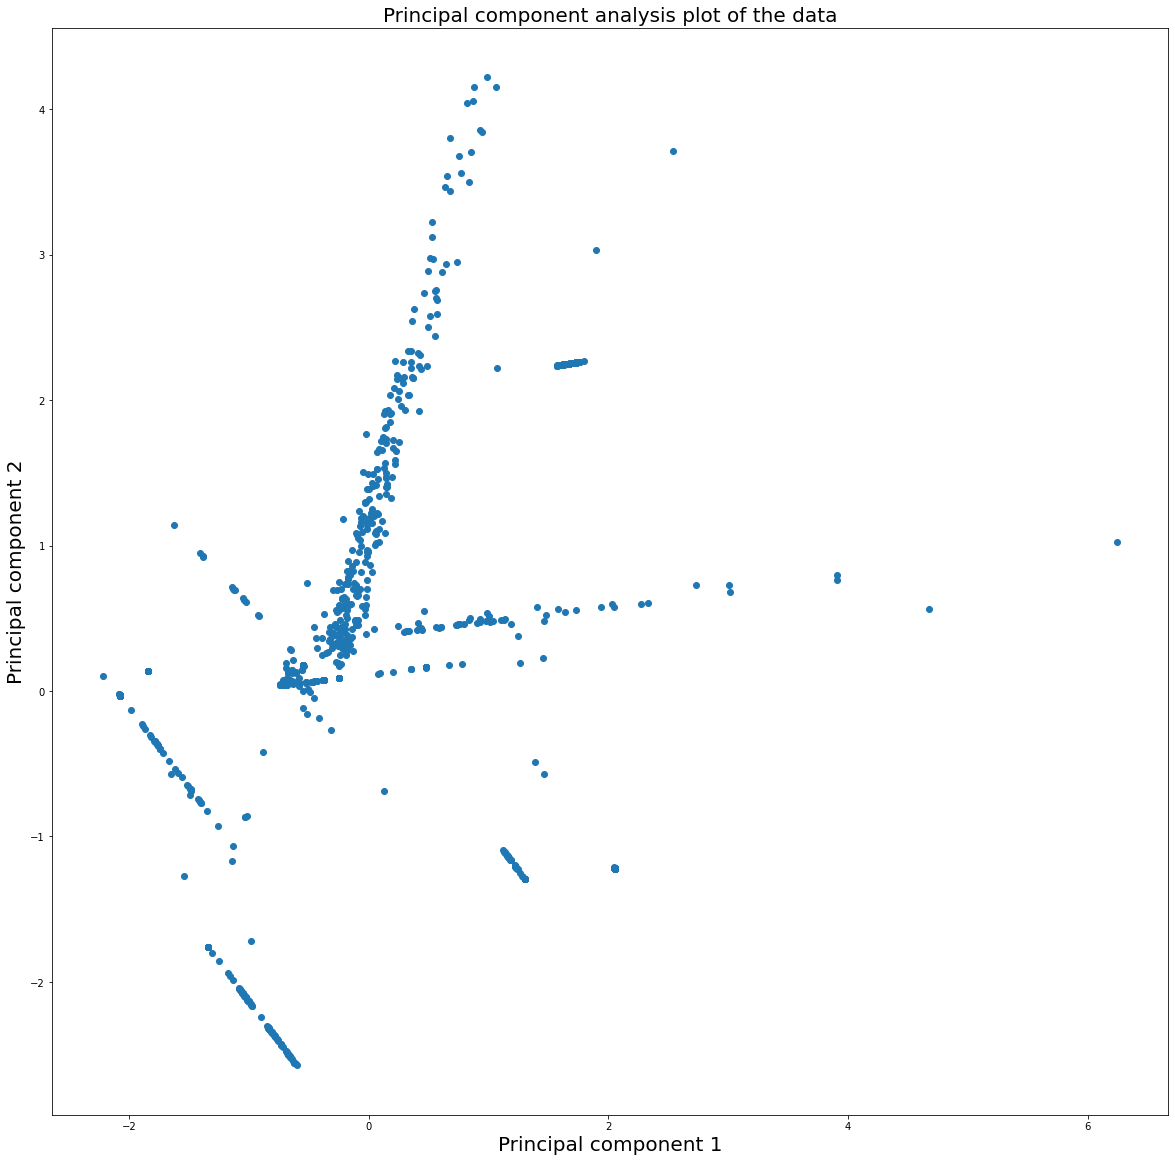

In [3]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#https://cmdlinetips.com/2020/12/compute-standardized-values-z-score-python/
#https://www.w3schools.com/python/python_ml_scatterplot.asp
#https://builtin.com/data-science/step-step-explanation-principal-component-analysis

#extracting column class out of the data
data2 = data.drop(columns=['class']) #data without class, since class is not used until ex4

#z-score Standardization
data_z = (data2-data2.mean())/(data2.std()) #data - mean of data / standard deviation of data
display(data_z) #just checking

#Principal component analysis
pca = PCA(n_components=2) #n = Principal components which is the number of dimensions (2)
pca.fit(data_z)
pca_out = pca.fit_transform(data_z)

#plotting
plt.figure(figsize=(20,20))
plt.scatter(pca_out[:,0], pca_out[:,1])
plt.title('Principal component analysis plot of the data', fontsize=20)
plt.xlabel('Principal component 1', fontsize=20)
plt.ylabel('Principal component 2', fontsize=20)
plt.show()

<b>Does it look like there are clear clusters? Don't worry if they're hard to see.</b></br>
Clusters are shown i.e. around (-1,-2), (-2,0) and (0,0) etc. So it does seem like there are clear clusters! They're a lot like lines or segments. The biggest one seems to be the one starting around (1,0) going diagonally to (1,4). 

Because clustering is an unsupervised learning method, the `class` column is completely unnecessary for most of these tasks. You will only need the `class` column in **Part 4**, where it's used to compute a performance metric and to visually compare clustering results to the classes.

### Part 2a: Agglomerative hierarchical clustering
 
 - Cluster the data into 4 clusters using agglomerative hierarchical clustering. Try different values for the "linkage" parameter.
 
 - Use the z-score standardized 6-dimensional data for clustering - not the principal components!
 
 - What is the significance of the linkage criterion in a hierarchical clustering algorithm?
 
 - Evaluate the clustering performance for each linkage criterion using a metric called "silhouette score".
 
 - What does silhouette score quantify and how is it computed?

In [4]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#https://stackoverflow.com/questions/37106983/scikit-learn-clustering-predictx-vs-fit-predictx
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

linkages = ['ward', 'complete', 'average', 'single'] #all possible linkage parameters found from source
silhouette_scores = []

for i in linkages: #going through all of the linkage criteria
    clusters = AgglomerativeClustering(n_clusters = 4, linkage = i).fit_predict(data_z) #"fit_predict is usually used for 
                                                                        # unsupervised machine learning transductive estimator."
    silhouette_scores.append(silhouette_score(data_z, clusters)) #appending the silhouette scores into the list of them
    print('Linkage: ',i,', Silhouette score: ',silhouette_score(data_z, clusters))

Linkage:  ward , Silhouette score:  0.6299185426448557
Linkage:  complete , Silhouette score:  0.48157598036619165
Linkage:  average , Silhouette score:  0.6241907400635869
Linkage:  single , Silhouette score:  0.7288757664364136


Out of all of the linkages, best silhouette score is with "Single" at 0.73. </br>
From scikit-learn.org:</br>
"_The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1._"

### Part 2b: Dendrograms

 - Plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix. Hint: while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (scipy.cluster.hierarchy.linkage).
 - Compute the linkage matrix using both `average` and `complete` linkage, and plot the dendrograms using scipy.cluster.hierarchy.dendrogram).
 - Truncate the dendrogram so that three levels of the dendrogram tree are visible for better readability.
 - How do you interpret the dendrograms? How do they differ?

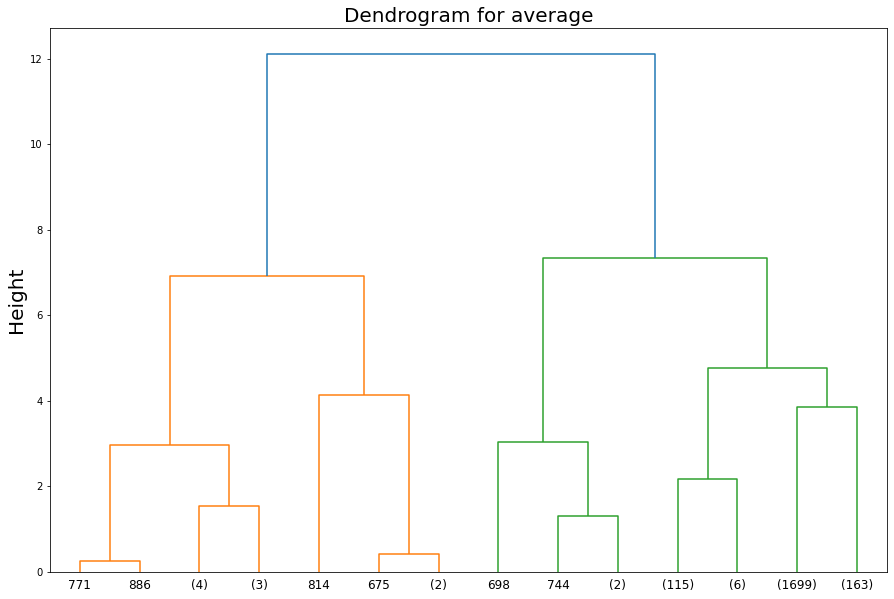

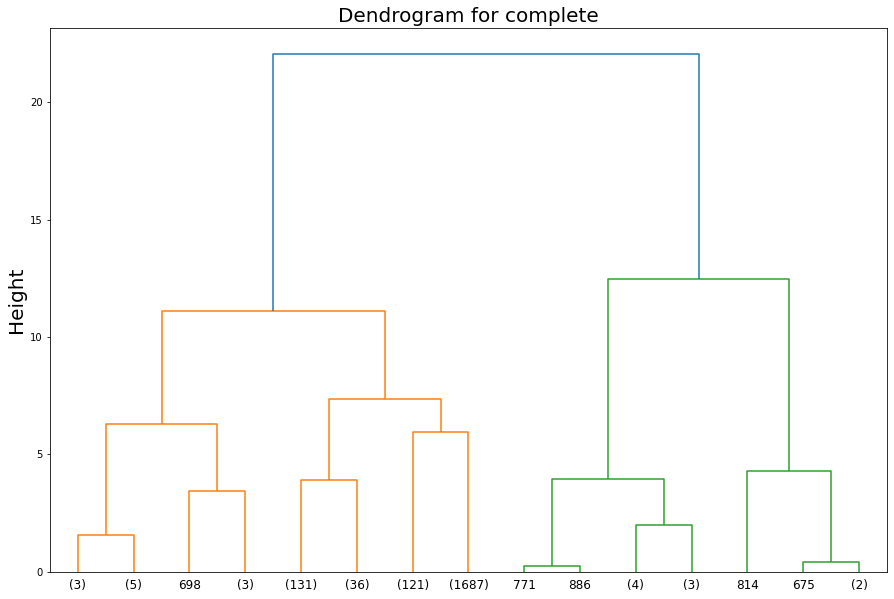

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# https://www.displayr.com/what-is-dendrogram/

# Linkage matrix for average
linkage_matrix_1 = linkage(data_z,method='average')

# plotting
plt.figure(figsize=(15,10))
# dendrogram for linkage matrix with average
dendro_1 = dendrogram(linkage_matrix_1,p=3,truncate_mode='level') #p = 3 three levels of the dendrogram tree are visible

plt.title('Dendrogram for average', fontsize=20)
plt.ylabel('Height', fontsize=20)
plt.show(dendro_1)

# --------------------------------------------------------------------

# Linkage matrix for complete
linkage_matrix_2 = linkage(data_z,method='complete')

# plotting
plt.figure(figsize=(15,10))
# dendrogram for linkage matrix with complete
dendro_2 = dendrogram(linkage_matrix_2,p=3,truncate_mode='level') #p = 3 three levels of the dendrogram tree are visible

plt.title('Dendrogram for complete', fontsize=20)
plt.ylabel('Height', fontsize=20)
plt.show(dendro_2)

</b>How do you interpret the dendrograms? How do they differ?</b></br>

We should focus on the height at which any two objects are joined to gether. So most similar objects in both the dendrogram of average and the dendrogram of complete are 771 and 886. The height of the dendrongram indicates the order in which the clusters were joined (displayr.com). If I understood this correctly, the "faster" (height = lower) the objects combine, the better the model is. So the smaller the height is, the better the model is perfoming. And by this knowledge, the dedrogram for average shows better performance, since all combinations or joinings are happening with height less or equal to 12 whereas dendrogram for complete shows that the final combinations happen when height is over 20. Dendrogram for average also shows a bit less combinations happening, which I assume translates to better performance. I had some trouble understanding the lot of this so I hope sincerely that I am somewhat correct! Please correct me if I'm wrong, these look quite interesting :D

### Part 3: _k_-means clustering

 - Perform _k_-means clustering on the data. Use 4 clusters.
 - Evaluate the clustering performance using silhouette score.
 - Experiment with some other numbers of clusters. Does the data fit better into a different number of clusters according to silhouette score?

In [6]:
# https://realpython.com/k-means-clustering-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# Got some help from Jeremias Shadbolt for this one. I was quite lost, since it had been a while since 
# I'd worked on these last time

# 4 clusters
k_means = KMeans(n_clusters=4).fit(data_z)
labels = k_means.predict(data_z)

# getting the silhouette score for the k-means clustering
k_means_sil_score = silhouette_score(data_z, labels)
print("K-means silhouette score with 4 clusters is: ", k_means_sil_score)

K-means silhouette score with 4 clusters is:  0.6340409774506831


In [7]:
# for appending the silhouette scores into
scores = []

# for there needs to be more than 1 clusters, we start from 2. The highest amount is just some random value which 
for i in range(2,26):                                     # I decided is 25
    k_means = KMeans(n_clusters=i).fit(data_z)
    labels = k_means.predict(data_z)
    scores.append(silhouette_score(data_z, labels))
    # getting the best silhouette score at the moment
    print("Best silhouette score atm: ", max(scores), "With value of i: ", i)
    
# getting the best silhouette score    
print("Best silhouette score of them all: ", max(scores))

Best silhouette score atm:  0.42108179248011124 With value of i:  2
Best silhouette score atm:  0.5419542961472762 With value of i:  3
Best silhouette score atm:  0.6340409774506831 With value of i:  4
Best silhouette score atm:  0.6581598820326457 With value of i:  5
Best silhouette score atm:  0.7547933749237424 With value of i:  6
Best silhouette score atm:  0.7727553051268473 With value of i:  7
Best silhouette score atm:  0.7870033282955192 With value of i:  8
Best silhouette score atm:  0.7870033282955192 With value of i:  9
Best silhouette score atm:  0.7870033282955192 With value of i:  10
Best silhouette score atm:  0.7870033282955192 With value of i:  11
Best silhouette score atm:  0.7870033282955192 With value of i:  12
Best silhouette score atm:  0.7870033282955192 With value of i:  13
Best silhouette score atm:  0.7870033282955192 With value of i:  14
Best silhouette score atm:  0.7913754185524502 With value of i:  15
Best silhouette score atm:  0.7970766864432394 With val

<b>Evaluate the clustering performance using silhouette score.</b></br>

Silhouette score seems to be around 0.63 with 4 clusters. This is about the same as the AHC with 4 clusters.

<b>Does the data fit better into a different number of clusters according to silhouette score?</b></br>

Looks like the silhouette score starts to fall of around 8 clusters. Beyond that the silhouette score only rises very little, so I'd say it's the most optimal cluster amount. Comparing this value to the  AHC with 4 clusters brings only a slight improvement in performance.

#### Rand score briefly described

Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
     
"Adjusted Rand index" is corrected for chance by using maximum and expected values of Rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)

###  Part 4a: Compare the clusters with the true labels (hierarchical clustering)
 
 - Cluster the data into 4 clusters using agglomerative hierarchical clustering.
 - Choose the linkage criterion that had the best silhouette score performance in Part 2a.
 - Visualize the data again using PCA, this time coloring the scatter plot based on the true class labels. Visually compare the two scatter plots: how well do the clusters found by the clustering algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. in subplots next to each other in the same figure).
 - For an objective evaluation of the clustering, compute the adjusted Rand score (use the scikit-learn implementation) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 - If the results seem unimpressive, don't get discouraged - clustering "real life" data sets to match classes is a difficult task, and a low Rand score does not necessarily mean that you have made a mistake.

In [8]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#https://stackoverflow.com/questions/37106983/scikit-learn-clustering-predictx-vs-fit-predictx
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

# making dataframes of the pca:s and of the true class labels
pca_df = pd.DataFrame(data=pca_out,columns=['PC1','PC2']) # using PCA here
labels_df = pd.DataFrame(data=data_z,columns=['class_type'])

# combining the both above
all_df = pd.concat([pca_df, data['class'], labels_df],axis=1)

# since I had some hard times with figuring out how to map the class into some easy to use form, I consulted Veeti Koivuniemi:
all_df['class_type'] = all_df['class']
all_df['class_type'] = all_df['class_type'].map({'denial_of_service': 0, 'normal': 1, 'probe': 2, 'unauthorized_remote_login': 3})


#display(all_df.head(15))
#display(all_df.tail(15))

# clustering as we did before:     #"fit_predict is usually used for unsupervised machine learning transductive estimator."
clusters2 = AgglomerativeClustering(n_clusters = 4, linkage = 'single').fit_predict(data_z)

# making the cluster dataframe
clusters2_df = pd.DataFrame(data=clusters2, columns = ['label'])
# got this far again without help, but again had to ask Veeti Koivuniemi for help (the problem was .copy())
# combining cluster dataframe with all_df's copy
clusters2_df = pd.concat([clusters2_df, all_df.copy()], axis = 1)

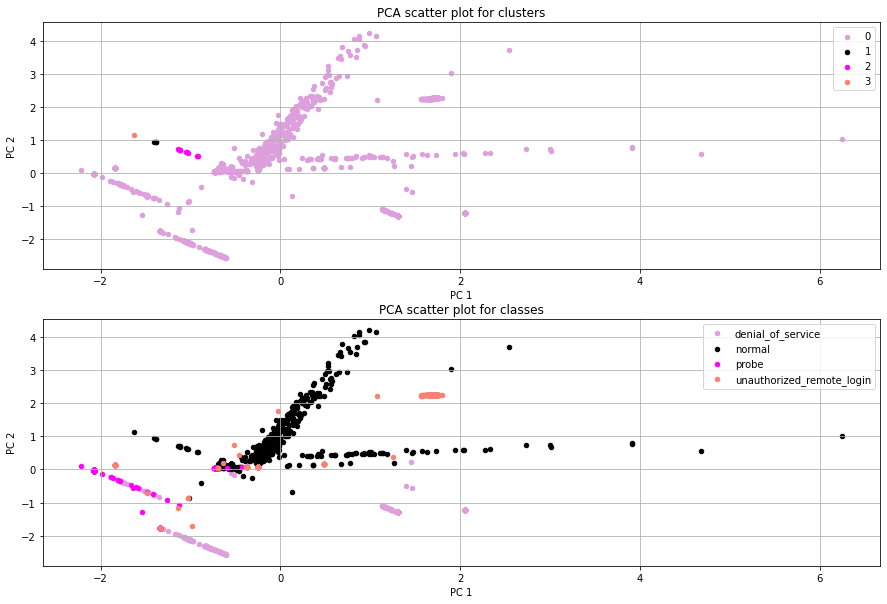

In [9]:
# grouping dataframe by class type to get the legend for plot! 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
class_group = all_df.groupby('class')
cluster_group = clusters2_df.groupby('label')

# plots on top of eachother
fig = plt.figure(figsize=(15,10))

# # scatter plot for classes of the original data
# ax = fig.add_subplot(2,1,1)
# for i, class_type in class_group:
#  ax.plot(class_type.PC1, class_type.PC2, marker='o',linestyle='', label=i)
# ax.legend() 
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.title('PCA scatter plot for class types')
# plt.grid(True)


# # scatter plot for the clusters 
# ax = fig.add_subplot(2,1,2)
# for i, label in cluster_group:
#  ax.plot(label.PC1, label.PC2, marker='o',linestyle='', label=i)
# ax.legend() 
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.title('PCA scatter plot for clusters')
# plt.grid(True)
# plt.show()

# as you can see, I couldn't get that to work. Got frustrated and asked Veeti yet again... I do not understand how the legends
# work?! I wanted to leave that there so you can see that I tried...
# https://stackoverflow.com/questions/64381550/matplotlib-scatter-plot-color-coded-by-text-how-to-add-legend

# scatter plot for clusters
ax = fig.add_subplot(2,1,1)
labelss = {0:"plum", 1:"black", 2:"magenta", 3:"salmon"}
for i, j in cluster_group:
    j.plot.scatter('PC1', 'PC2', label=i, c=labelss[i], ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA scatter plot for clusters')
plt.grid(True)

#scatter plot for the classes of the original data
ax = fig.add_subplot(2,1,2)
colorss = {"denial_of_service" : "plum", "normal": "black", "probe": "magenta", "unauthorized_remote_login": "salmon" }
for i, j in class_group:
    j.plot.scatter('PC1', 'PC2', label=i, c=colorss[i], ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA scatter plot for classes')
plt.grid(True)


plt.show()   

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

# Rand scores 
# gotta get a list of the all_df's labels first:
all_df['class'] = all_df['class_type'].replace('denial_of_service',0).replace('normal',1).replace('probe',2).replace('unauthorized_remote_login',3)
all_df_list = all_df['class'].to_list()
print("Adjusted Rand score: ", adjusted_rand_score(all_df_list, clusters2))

Adjusted Rand score:  0.00011807828578910034


It seems I didn't understand clusters all that well in the first exercise. I mean sure they were large groups of dots, but not clusters in essance. The largest black cluster in the scatter plot for classes there seems to be mostly normals. Only a little "URL":s and probes. The second largest amount is the "DOS"s. When PC1 is around -1 and under that, there are mostly probes and DOSs. Around PC1 = 0 there are mostly the normals and most of the URLs are around 1 < PC1 < 2. 

In the plot of clusters, mostly DOSs are seen. Only a couple of URLs, normals and probes are available. The ratios between the two plots are very unalike. The rand score is also VERY tiny. 

### Part 4b: Compare the clusters with true labels (_k_-means clustering)

 - Repeat the above steps, but this time using _k_-means clustering instead of hierarchical clustering.
 - Which performs better according to the adjusted Rand score?

In [11]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#https://stackoverflow.com/questions/37106983/scikit-learn-clustering-predictx-vs-fit-predictx
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

# making dataframes of the pca:s and of the true class labels
pca_df = pd.DataFrame(data=pca_out,columns=['PC1','PC2']) # using PCA here
labels_df = pd.DataFrame(data=data_z,columns=['class_type'])

# combining the both above
all_df = pd.concat([pca_df, data['class'], labels_df],axis=1)

# since I had some hard times with figuring out how to map the class into some easy to use form, I consulted Veeti Koivuniemi:
all_df['class_type'] = all_df['class']
all_df['class_type'] = all_df['class_type'].map({'denial_of_service': 0, 'normal': 1, 'probe': 2, 'unauthorized_remote_login': 3})



# k-means clustering as we did before:     #"fit_predict is usually used for unsupervised machine learning transductive estimator."
k_means2 = KMeans(n_clusters=4).fit_predict(data_z)

# making the cluster dataframe
k_means2_df = pd.DataFrame(data=k_means2, columns = ['label'])
# got this far again without help, but again had to ask Veeti Koivuniemi for help (the problem was .copy())
# combining cluster dataframe with all_df's copy
k_means2_df = pd.concat([k_means2_df, all_df.copy()], axis = 1)

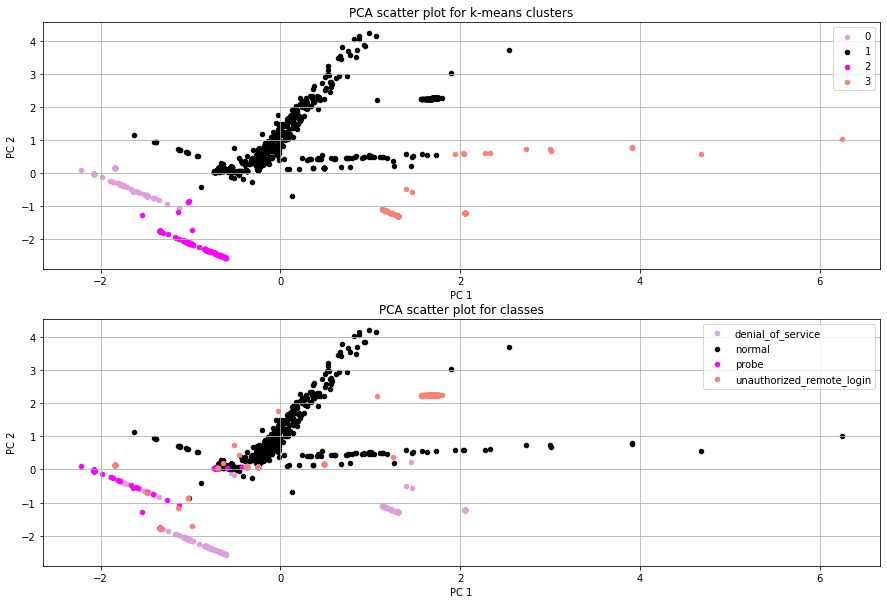

In [12]:
# grouping dataframe by class type to get the legend for plot! 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
class_group = all_df.groupby('class')
cluster_group = k_means2_df.groupby('label')

# plots on top of eachother
fig = plt.figure(figsize=(15,10))

# https://stackoverflow.com/questions/64381550/matplotlib-scatter-plot-color-coded-by-text-how-to-add-legend

# scatter plot for clusters
ax = fig.add_subplot(2,1,1)
labelss = {0:"plum", 1:"black", 2:"magenta", 3:"salmon"}
for i, j in cluster_group:
    j.plot.scatter('PC1', 'PC2', label=i, c=labelss[i], ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA scatter plot for k-means clusters')
plt.grid(True)

#scatter plot for the classes of the original data
ax = fig.add_subplot(2,1,2)
colorss = {"denial_of_service" : "plum", "normal": "black", "probe": "magenta", "unauthorized_remote_login": "salmon" }
for i, j in class_group:
    j.plot.scatter('PC1', 'PC2', label=i, c=colorss[i], ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA scatter plot for classes')
plt.grid(True)


plt.show()   

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

# Rand scores 
# gotta get a list of the all_df's labels first:
all_df['class'] = all_df['class_type'].replace('denial_of_service',0).replace('normal',1).replace('probe',2).replace('unauthorized_remote_login',3)
all_df_list = all_df['class'].to_list()
print("Adjusted Rand score: ", adjusted_rand_score(all_df_list, k_means2))

Adjusted Rand score:  0.2951546107072655


With k-means the adjusted rand score is a lot higher than hierarchial clusterings 0.000118, at 0.29515. This, I presume, means that the k-means clustering performs better. 

### Part 5 (optional BONUS task): Clustering unlabeled data

In this task, you are working with data where the classes are not available, given as `ex3_seeds_data_BONUS.csv` on Moodle. [The original data set](https://archive.ics.uci.edu/ml/datasets/seeds) is available for for those who are interested, but **use the slightly modified data on Moodle** instead.

In general this is a very challenging and open-ended type of task that requires in-depth domain knowledge for meaningful results. Note, however, that in this exercise you are **not required** to research the domain in question (e.g. properties of different varieties of wheat). You might need to search for more information related to clustering in order to complete this exercise.

Some of the questions are open-ended and have no correct answer. It's enough to clearly show that you thought about the questions.

 - As in Part 1, z-score standardize the data, project it to 2 dimensions using PCA and visualize the result in a scatter plot.
 - Does the scatter plot look like the data might have a clustered structure? How many clusters do you see?
 - Decide, based on what you've learned about silhouette score and Rand score, which performance metric you should use in this task. Justify your choice.
 - Get an objective evaluation of how many clusters the data most likely has by using your chosen performance metric. Try both _k_-means clustering and agglomerative hierarchical clustering with different linkage criterions and see which performs best.
 - Visualize (with color) the best-performing result in the PCA scatter plot you created earlier.